In [38]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [ ]:
cd ~/surp

In [39]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver
import gas_phase_data
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv("md22.csv")

In [3]:
import sys
sys.path.append("../")
import surp
import multizone_sim

In [4]:
#plt.rcParams["text.color"] = "black"
#plt.rcParams["axes.labelcolor"] = "white"
#plt.rcParams["xtick.color"] = "white"
#plt.rcParams["ytick.color"] = "white"
#plt.rcParams["font.size"] = 20

In [5]:
mc = ModelComparer(["fiducial", "k10", "v13", "k16"])

# Mean abundance star tracks

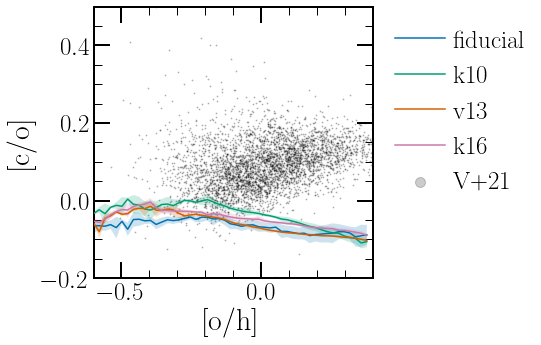

saved


In [11]:
fig, ax = plt.subplots()
ax.set_ylim(-0.2, 0.5)
mc.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4), filename="cooh_agb", ax=ax)


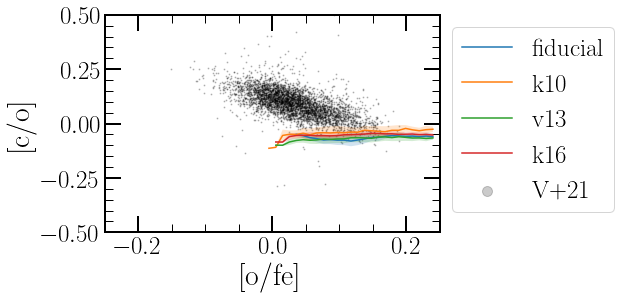

saved


In [9]:
fig, ax = plt.subplots()
ax.set_ylim(-0.5, 0.5)
mc.plot_mean_stars("[o/fe]", "[c/o]", xlim=(-0.25, 0.25), filename="coofe_agb", ax=ax)

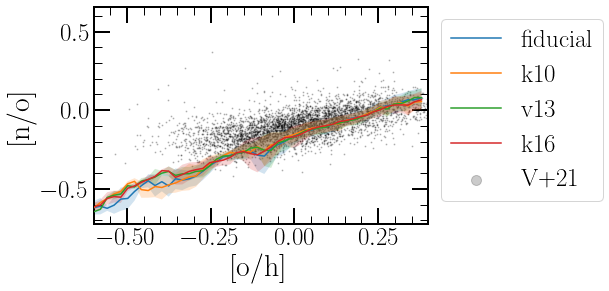

<Figure size 576x432 with 0 Axes>

In [16]:
mc.plot_mean_stars("[o/h]", "[n/o]", xlim=(-0.6, 0.4))

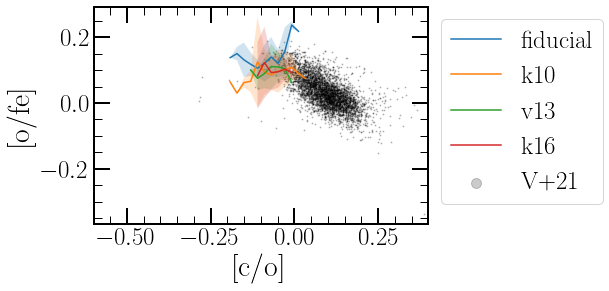

<Figure size 576x432 with 0 Axes>

In [11]:
mc.plot_mean_stars("[c/o]", "[o/fe]", xlim=(-0.2, 0.4))

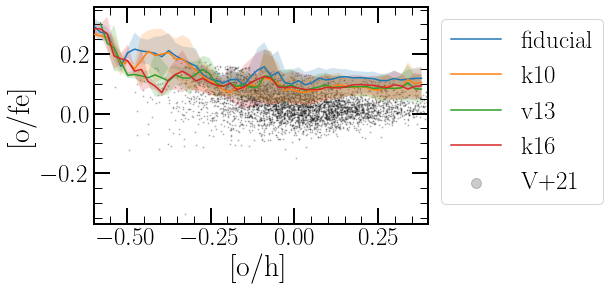

<Figure size 576x432 with 0 Axes>

In [12]:
mc.plot_mean_stars("[o/h]", "[o/fe]", xlim=(-0.6, 0.4))

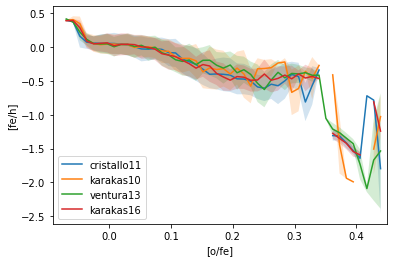

<Figure size 576x432 with 0 Axes>

In [20]:
fig, ax = plt.subplots()

mc.plot_mean_stars("[o/fe]", "[fe/h]", ax=ax)

fig.savefig("figures/test.png")

# Gas phase tracks

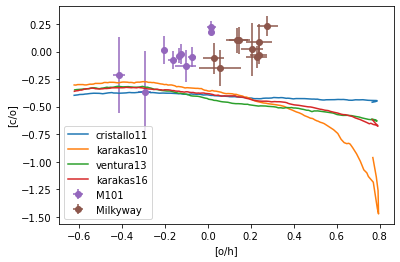

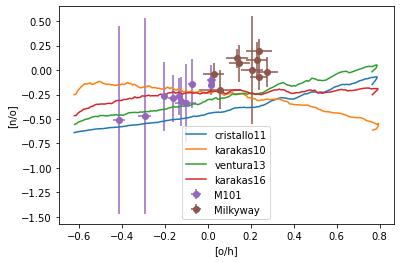

In [21]:
mc.plot_gas("[o/h]", "[c/o]")
mc.plot_gas("[o/h]", "[n/o]")
# mc.plot_gas("[fe/h]", "[c/n]")

# MDFs

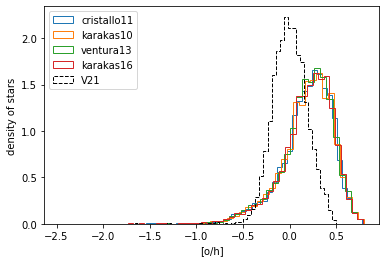

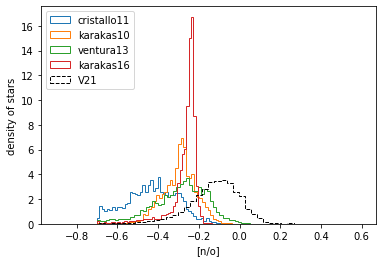

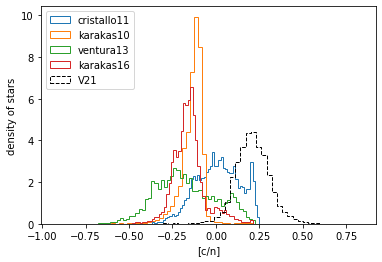

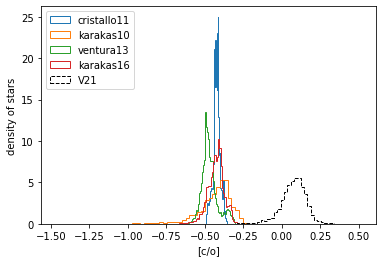

In [22]:
mc.plot_mdf("[o/h]")
mc.plot_mdf("[n/o]")
mc.plot_mdf("[c/n]")
mc.plot_mdf("[c/o]")

# Stars

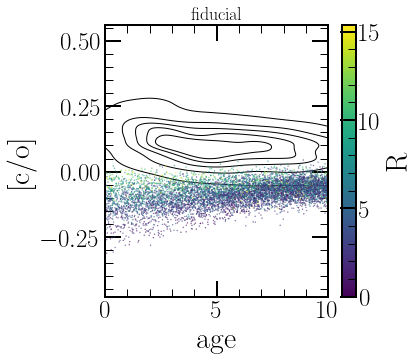

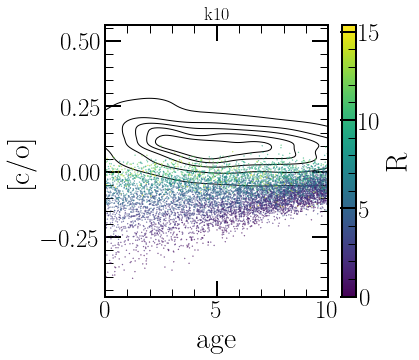

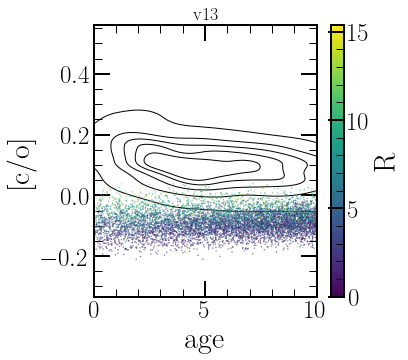

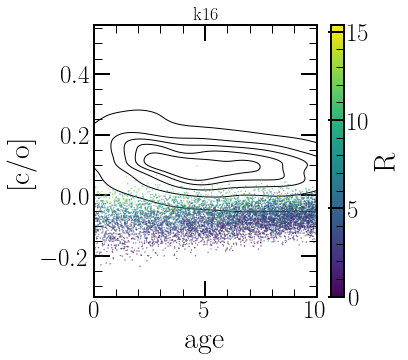

In [17]:
mc.plot_stars("age", "[c/o]", c="R_origin", c_label="R", xlim=(0, 10))

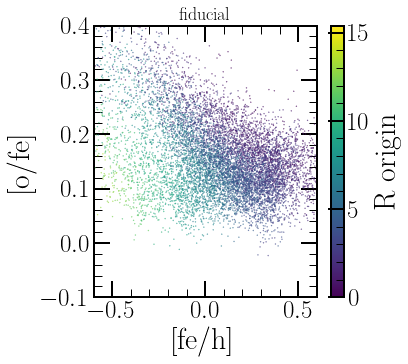

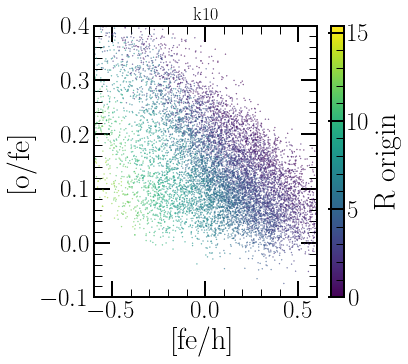

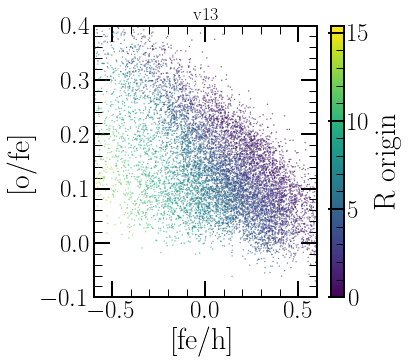

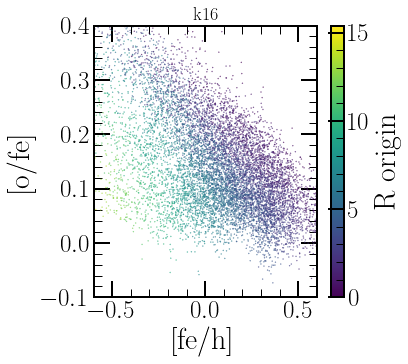

In [22]:
mc.plot_stars("[fe/h]", "[o/fe]", c="R_origin", c_label="R origin", xlim=(-0.6, 0.6), ylim=(-0.1, 0.4))

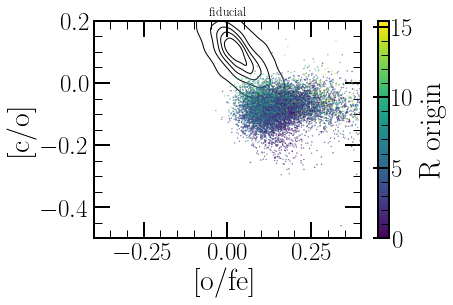

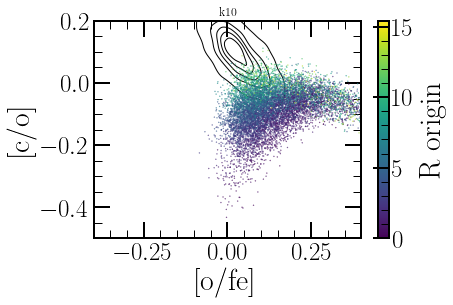

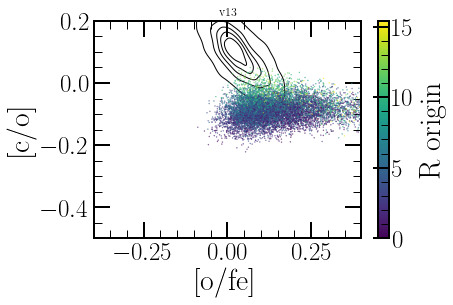

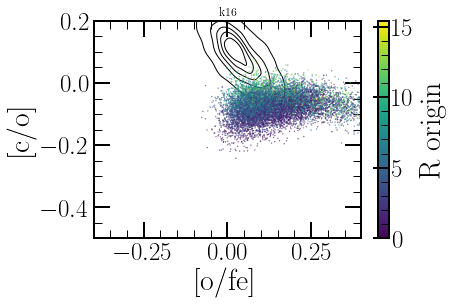

In [10]:
mc.plot_stars("[o/fe]", "[c/o]", c="R_origin", c_label="R origin", xlim=(-0.4, 0.4), ylim=(-0.5, 0.2))mc.plot_stars("[o/fe]", "[c/o]", c="R_origin", c_label="R origin", xlim=(-0.4, 0.4), ylim=(-0.5, 0.2))

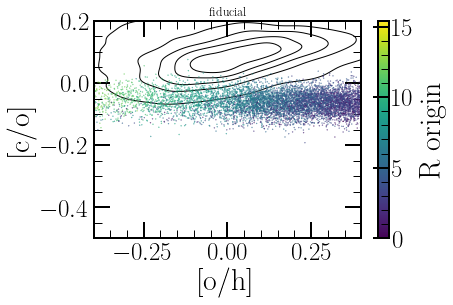

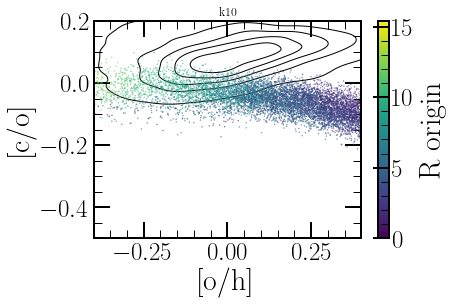

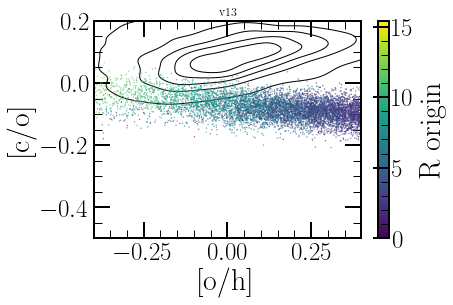

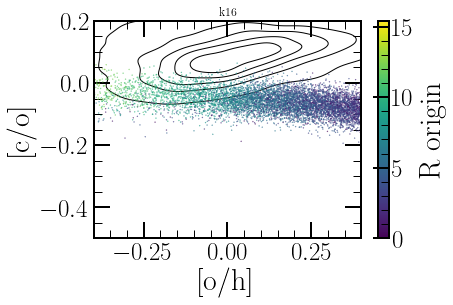

In [19]:
mc.plot_stars("[o/h]", "[c/o]", c="R_origin", c_label="R origin", xlim=(-0.4, 0.4), ylim=(-0.5, 0.2))

# Gas phase tracks

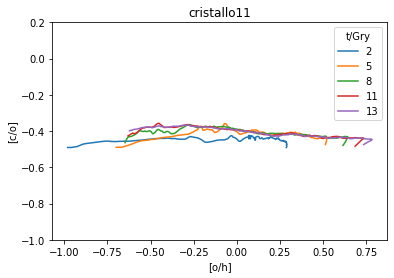

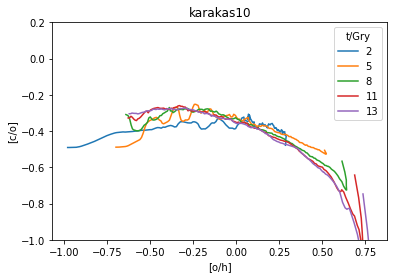

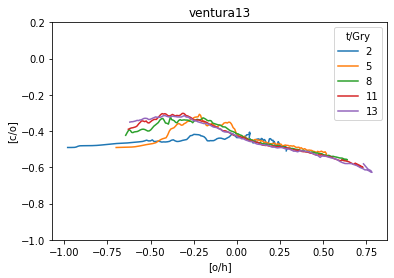

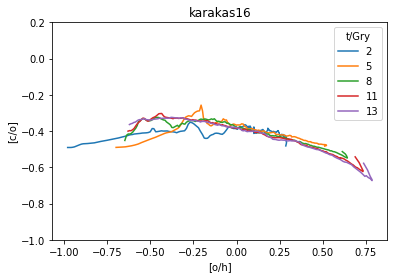

In [25]:
mc.plot_model_fixed_t(ylim=(-1, 0.2))

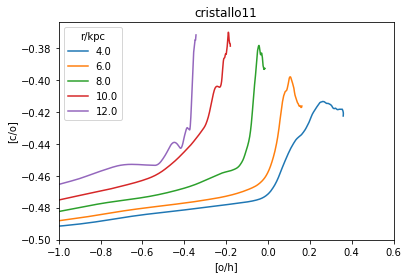

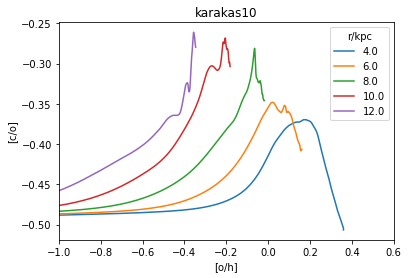

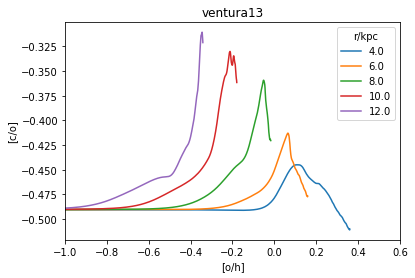

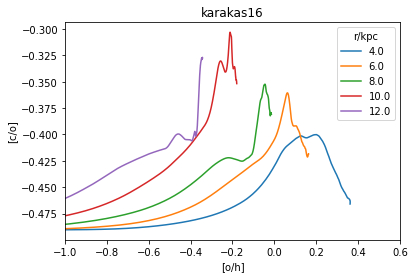

In [26]:
mc.plot_model_fixed_r()

# Isolating AGB trends...

In [18]:
import vice
vice.yields.ccsne.settings["fe"]

0.0012

In [22]:
def y_c_cc(Z):
    return 0.005

y_o_cc = 0.015
dt = 0.01 * 1e9 # 10 Myr

w = 100
def moving_average(x):
    return np.convolve(x, np.ones(w), "valid")/w

def get(h, value):
    return moving_average(np.array(h[value])[:-1])

def get_dot(h, value):
    arr = np.array(h[value])
    return moving_average((arr[1:] - arr[:-1])/dt)


def calc_m_dot_c_agb(h):
    sfr = get(h, "sfr")
    z_c = get(h, "z(c)")
    z = 0.014*10**np.array(h["[m/h]"][:-1])

    eta = get(h, "eta_0")
    r = get(h, "r_eff")
    t = get(h, "time")

    m_dot_c = get_dot(h, "mass(c)")

    m_dot_c_out = - sfr * z_c*(1 + eta - r)
    m_dot_c_cc = sfr*y_c_cc(z)
    m_dot_c_agb = m_dot_c - m_dot_c_cc - m_dot_c_out
    return m_dot_c_agb

def calc_m_dot_fe_ia(h):
    sfr = get(h, "sfr")
    z_fe = get(h, "z(fe)")
    z = 0.014*10**np.array(h["[m/h]"][:-1])

    eta = get(h, "eta_0")
    r = get(h, "r_eff")
    t = get(h, "time")

    m_dot_fe = get_dot(h, "mass(fe)")

    m_dot_fe_out = - sfr * z_fe*(1 + eta - r)
    m_dot_fe_cc = sfr*0.0012
    m_dot_fe_ia = m_dot_fe - m_dot_fe_cc - m_dot_fe_out
    return m_dot_fe_ia + m_dot_fe_cc

In [7]:
h = mc.models["fiducial"].zones["zone80"].history

m_dot_c_agb = calc_m_dot_c_agb(h)

Text(0.5, 0, 't')

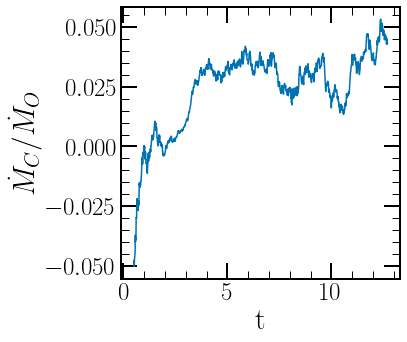

In [16]:
plt.plot(get(h, "time"), m_dot_c_agb/get(h, "sfr")/y_o_cc)
plt.ylabel(r"$\dot{M}_C/\dot{M}_O$")
plt.xlabel("t")

Text(0.5, 0, 't')

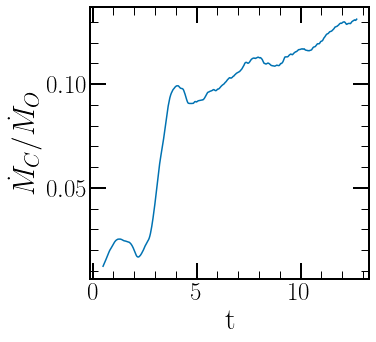

In [21]:
plt.plot(get(h, "time"), calc_m_dot_fe_ia(h)/get(h, "sfr")/y_o_cc)
plt.ylabel(r"$\dot{M}_C/\dot{M}_O$")
plt.xlabel("t")

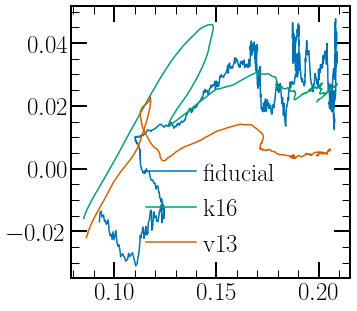

In [27]:
for model in ["fiducial", "k16", "v13"]:
    h = mc.models[model].zones["zone70"].history
    plt.plot(calc_m_dot_fe_ia(h)/get(h, "sfr")/y_o_cc, calc_m_dot_c_agb(h)/get(h, "sfr")/y_o_cc, label=model)

plt.legend()

In [47]:
import apogee_analysis as aah

In [48]:
v21 = aah.vincenzo2021()


In [49]:
v21["[o/fe]"]

0       0.212456
1       0.024517
2       0.182002
3       0.049900
4       0.226372
          ...   
5071   -0.008028
5072    0.032461
5073    0.083213
5074    0.012643
5075    0.060838
Name: [o/fe], Length: 4875, dtype: float64

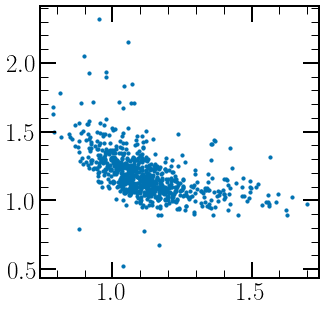

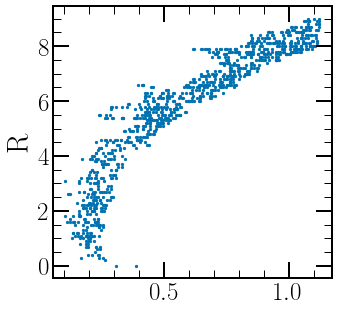

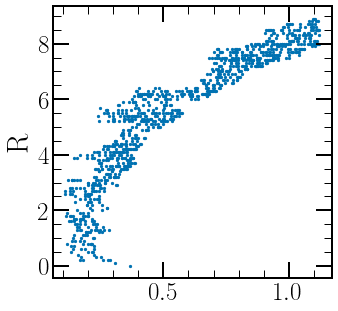

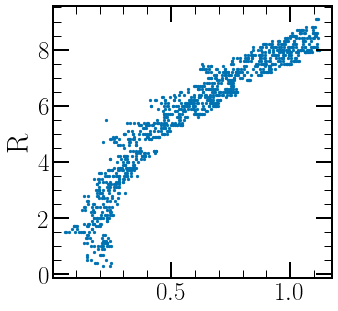

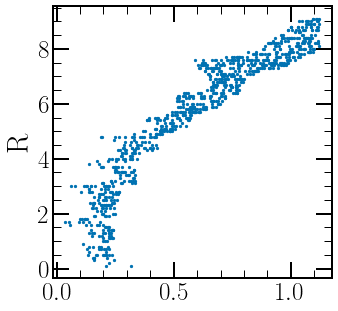

In [71]:
for name in mc.stars.keys():
    s = mc.stars[name]
    filt = v21["[fe/h]"] > -0.15
    filt &= v21["[fe/h]"] < -0.05
    df1 = v21[filt]
    #plt.scatter(10**df1["[o/fe]"], 10**df1["[c/o]"], s=10, c="black")
    df = s.filter("[fe/h]", ">", -0.15)
    df = df.filter("[fe/h]", "<", -0.05)

    #plt.scatter(10**np.array(df["[o/fe]"]), 10**np.array(df["[c/o]"]), s=10)
    plt.scatter(np.log10(13.2 - np.array(df["age"])), df["R_origin"], s=5)
    plt.ylabel("R")
    plt.show()

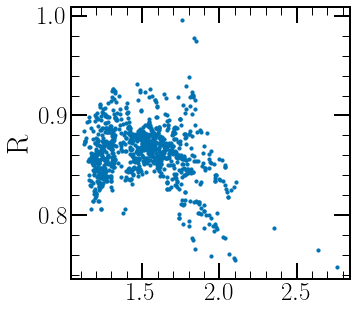

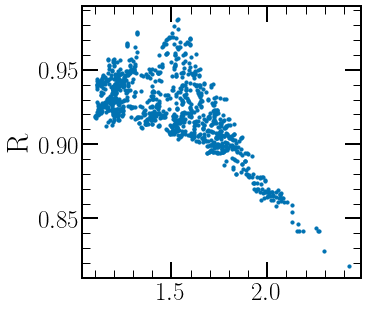

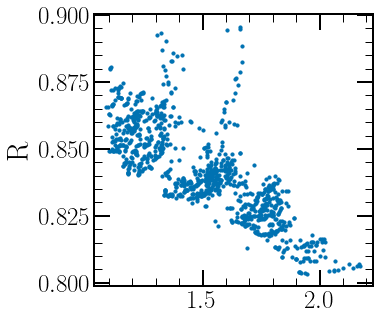

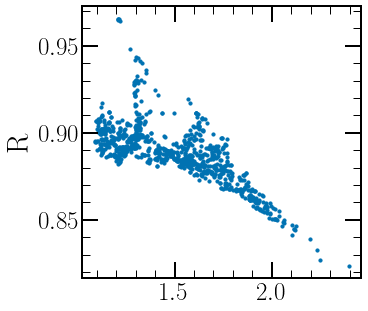

In [72]:
for name in mc.stars.keys():
    s = mc.stars[name]
    filt = v21["[fe/h]"] > -0.15
    filt &= v21["[fe/h]"] < -0.05
    df1 = v21[filt]
    #plt.scatter(10**df1["[o/fe]"], 10**df1["[c/o]"], s=10, c="black")
    df = s.filter("[fe/h]", ">", -0.15)
    df = df.filter("[fe/h]", "<", -0.05)

    plt.scatter(10**np.array(df["[o/fe]"]), 10**np.array(df["[c/o]"]), s=10)

    plt.show()

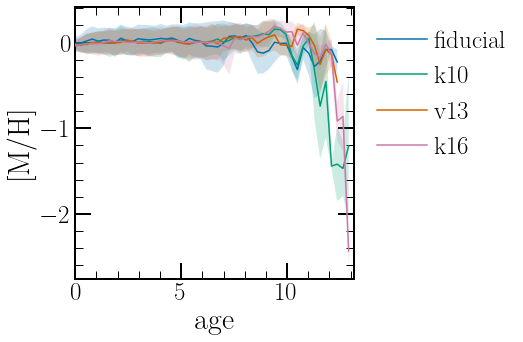

<Figure size 576x432 with 0 Axes>

In [75]:
mc.plot_mean_stars("age", "[M/H]")

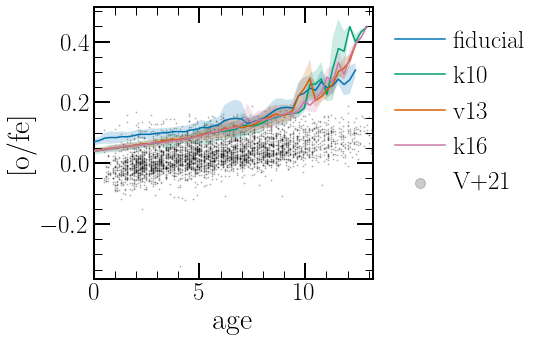

<Figure size 576x432 with 0 Axes>

In [76]:
mc.plot_mean_stars("age", "[o/fe]")

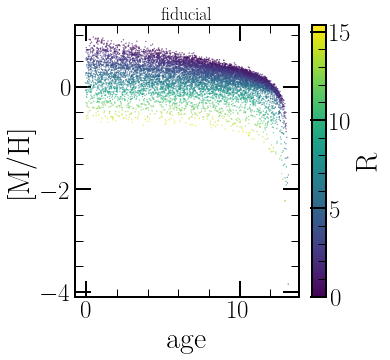

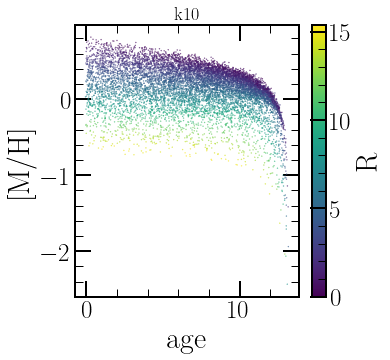

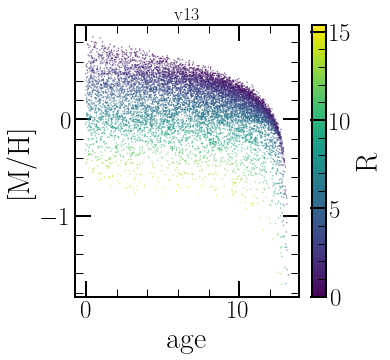

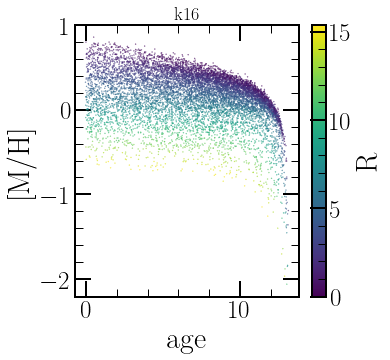

In [78]:
mc.plot_stars("age", "[M/H]", c="R_origin", c_label="R")